# 
<h1 style="text-align: center;">ELE489 FUNDAMENTALS OF MACHINE LEARNING</h1>
<h2 style="text-align: center;">HW4</h2>
<h3 style="text-align: center;">ALI OZYUKSEL</h3>
<h3 style="text-align: center;">2220357137</h3>
<h3 style="text-align: center;"> </h3>
<h3 style="text-align: center;">24.05.2025</h3>

## Question 1 <a id="Question1"></a>



### Set-up for rest of the code <a id="Set-up for rest of the code"></a>
* Here is the initilation of libraries, the data and the functions that will be used for rest of the code
* Visualizer will show the elements in the mnist dataset which are predicted true or false for the model.
* Plotter will take model fitting histories and plot the loss/accuracy plots for comparision purposes.
* Those will shorten the code and make it easier to read.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import visualkeras
import os
import warnings
import json
from datetime import datetime
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data
x_train = (x_train.reshape(-1, 28, 28, 1) - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_test = (x_test.reshape(-1, 28, 28, 1) - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
# visualizer will show the elements in the dataset
def visualizer(model:tf.keras.Model,name:str="model"):
	"""
	visualizes the model and the dataset such that 
		- the first picture is the true prediction
		- the second picture is the false prediction
	Args:
		model: tf.keras.Model object
	"""
	y_pred = model.predict(x_test)               
	y_classes = np.argmax(y_pred, axis=1)   
	y_true = y_test
	true_indices = np.where(y_classes == y_true)[0]
	false_indices = np.where(y_classes != y_true)[0]
	int1 = int(np.random.randint(0, len(true_indices), size=1)[0])
	i_true = true_indices[int1]
	plt.figure(figsize=(6,3))
	plt.subplot(1, 2, 1)
	plt.imshow(x_test[i_true].reshape(28, 28), cmap='binary')
	plt.title(f"Predicted: {y_classes[i_true]}\nTrue: {y_true[i_true]}")
	plt.axis('off')
	int2 = int(np.random.randint(0, len(false_indices), size=1)[0])
	i_false = false_indices[int2]
	plt.subplot(1, 2, 2)
	plt.imshow(x_test[i_false].reshape(28, 28), cmap='binary')
	plt.title(f"Predicted: {y_classes[i_false]}\nTrue: {y_true[i_false]}")
	plt.axis('off')

	plt.tight_layout()
	os.makedirs('prediction', exist_ok=True)
	plt.savefig(f'prediction\\{name}.png', bbox_inches='tight')
	plt.show()
	#print(f"Total Number of predicted false: {len(incorrect_indices)}")
	#print(f"Total Number of predicted true: {len(correct_indices)}")

# plotter function will plot the loss and accuracy of the model
def plotter(*histories, labels=None,name:str="model"):
	"""
	plots the loss and accuracy of the model such that
		- the first plot is the loss curve
		- the second plot is the accuracy curve

	Args:
		histories: history objects 
		labels (list of str): label for every model
	"""
	if labels is None:
		labels = [f"Model {i+1}" for i in range(len(histories))]

	plt.figure(figsize=(12, 5))

	plt.subplot(1, 2, 1)
	for hist, label in zip(histories, labels):
		plt.plot(hist.history.get('loss', []), label=f'Train Loss - {label}')
		plt.plot(hist.history.get('val_loss', []), label=f'Val Loss - {label}')
	plt.title('Loss Curve')
	plt.xlabel('Epoch')
	plt.ylabel('Loss')
	plt.legend()

	plt.subplot(1, 2, 2)
	for hist, label in zip(histories, labels):
		plt.plot(hist.history.get('accuracy', []), label=f'Train Acc - {label}')
		plt.plot(hist.history.get('val_accuracy', []), label=f'Val Acc - {label}')
	plt.title('Accuracy Curve')
	plt.xlabel('Epoch')
	plt.ylabel('Accuracy')
	plt.legend()

	plt.tight_layout()

	summary_text = " | ".join([
		f"{label}: {hist.history['val_accuracy'][-1]*100:.2f}%" 
		if 'val_accuracy' in hist.history else f"{label}: N/A"
		for hist, label in zip(histories, labels)
	])
	plt.figtext(0.5, -0.05, f"Final Validation Accuracies → {summary_text}",
				wrap=True, horizontalalignment='center', fontsize=10)
	os.makedirs('plots', exist_ok=True)
	plt.savefig(f'plots\{name}.png',bbox_inches='tight')
	plt.show()

# model_visualizer will visualize the model architecture and save it as an image
def model_visualizer(model:tf.keras.Model,name:str="model"):
	"""
	visualizes the model architecture and saves it as an image such that
		- the image will be saved in the models folder
		- the name of the image will be the name of the model
	Args:
		model: tf.keras.Model object.
		name: name of the model (will be string)
	"""
	os.makedirs('models', exist_ok=True)

	try:
		img = visualkeras.layered_view(model, legend=True, draw_volume=True, show_dimension=True)
	except Exception:
		warnings.filterwarnings("ignore", category=UserWarning)
		img = visualkeras.layered_view(model, legend=True, draw_volume=True, show_dimension=True)

	img_path = f'models/{name}.png'
	img.save(img_path)

	fig, ax = plt.subplots(figsize=(10, 8))
	ax.imshow(img)
	ax.axis('off')
	plt.title(name, fontsize=16, pad=20)

	fig.tight_layout()
	fig.subplots_adjust(top=0.92)
	fig.savefig(img_path, bbox_inches='tight')
	plt.show()

def logger(model: tf.keras.Model, history: tf.keras.callbacks.History, name: str = "model"):
    """
    saves the model's log and training history for later analysis.

    Args:
        model (tf.keras.Model): trained model to be saved.
        history (tf.keras.callbacks.History): history object returned from model.fit().
        name (str): Name of the log directory and saved files.
    """

    os.makedirs('logs', exist_ok=True)
    log_dir = os.path.join('logs', name)
    os.makedirs(log_dir, exist_ok=True)

    model_path = os.path.join(log_dir, f"{name}.keras")
    model.save(model_path)

    history_path = os.path.join(log_dir, f"{name}_history.json")
    with open(history_path, 'w') as f:
        json.dump(history.history, f, indent=4)

    summary_path = os.path.join(log_dir, f"{name}_summary.txt")
    try:
        final_val_acc = history.history['val_accuracy'][-1] * 100
    except KeyError:
        final_val_acc = "N/A"
    with open(summary_path, 'w') as f:
        f.write(f"Model: {name}\n")
        f.write(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Epochs: {len(history.history['loss'])}\n")
        f.write(f"Final val_accuracy: {final_val_acc:.2f}%\n")



### Baseline Architecture
* Here is the baseline architecture given in the question. 
* It labeled as model_base for rest of the code to make it easier to read.

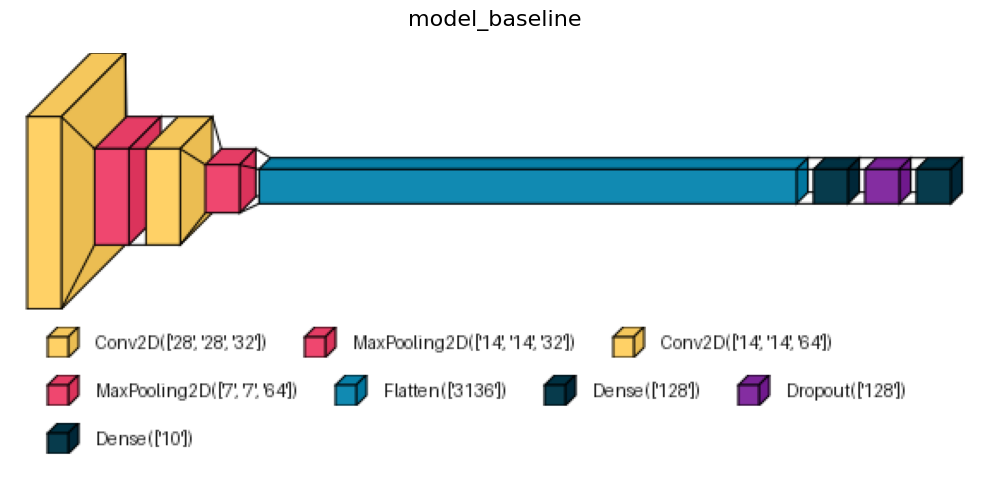

In [65]:
# Baseline architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_visualizer(model,'model_baseline')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8491 - loss: 0.4691 - val_accuracy: 0.9836 - val_loss: 8.8898
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9752 - loss: 0.0846 - val_accuracy: 0.9871 - val_loss: 6.8800
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9808 - loss: 0.0608 - val_accuracy: 0.9862 - val_loss: 7.0534
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9845 - loss: 0.0485 - val_accuracy: 0.9879 - val_loss: 6.2810
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9875 - loss: 0.0402 - val_accuracy: 0.9896 - val_loss: 6.0600
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9901 - loss: 0.0323 - val_accuracy: 0.9899 - val_loss: 6.5118
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9907 - loss: 0.0296 - val_accuracy: 0.9905 - val_loss: 6.1355
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9911 - loss: 0.0278 - val_accuracy: 0.

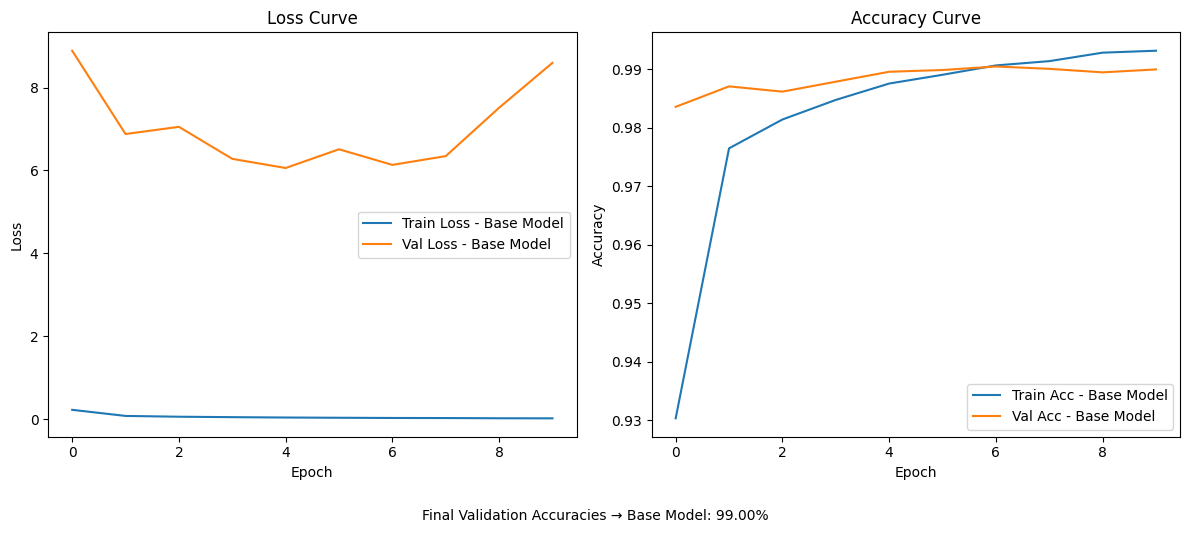

Acvuracy: 99.00%


In [30]:
# fitting the model to learn from the data
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

plotter(history, labels=['Base Model'],name='q1')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Acvuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


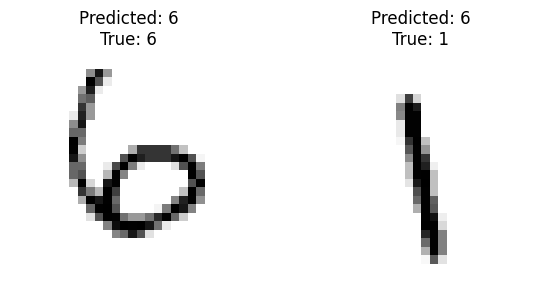

In [74]:
visualizer(model,'baseline')

In [72]:
logger(model, history, name='baseline')

## Question 2
* Question 2 asks to change at least 3 architectural parameters.
* To do that two model are built with  different changing parameters with given in the question.
* model_a is changed version of the baseline:
    * 5x5 kernel is used
    * leakyrelu is used instead of relu
    * batch normalization is used
    * global average pooling is used
    * it is not good enough
* model_b is worsened version of the baseline:
    * 1x1 kernel is used
    * tanh is used
    * no other parameters are implemented
    * used tanh instead of softmax
    * its performance is terrible.
* BASELINE IS GIVEN IN THE PLOTS FOR COMPARISION PURPOSES.

### Model A

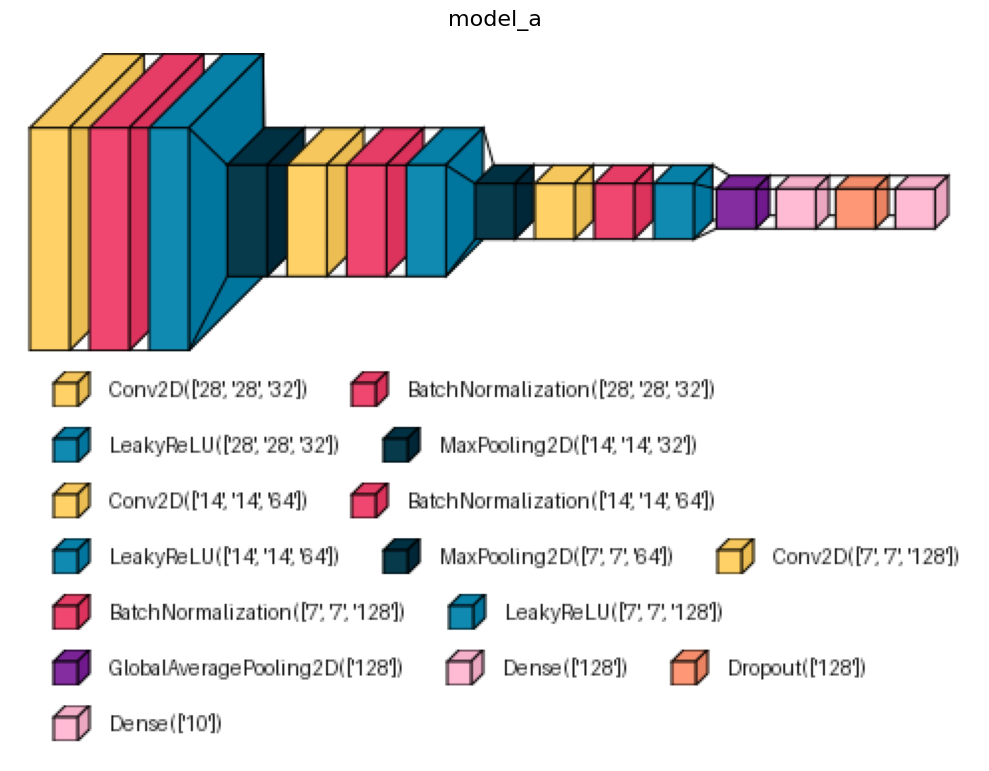

In [82]:
# model a is the changed version of baseline with at least 3 different parameters 
model_a = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (5, 5), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (5, 5), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (5, 5), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_a.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model_a.build(input_shape=(None, 28, 28, 1)) 
model_visualizer(model_a,'model_a')

In [83]:
history_a = model_a.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.7606 - loss: 0.7369 - val_accuracy: 0.5275 - val_loss: 654.4254
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9536 - loss: 0.1664 - val_accuracy: 0.7400 - val_loss: 247.6570
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9641 - loss: 0.1241 - val_accuracy: 0.7648 - val_loss: 378.1067
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9686 - loss: 0.1103 - val_accuracy: 0.8399 - val_loss: 296.8169
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.9721 - loss: 0.0937 - val_accuracy: 0.8161 - val_loss: 186.6950
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9729 - loss: 0.0879 - val_accuracy: 0.6061 - val_loss: 569.2780
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9751 - loss: 0.0800 - val_accuracy: 0.8510 - val_loss: 99.8184
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9797 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


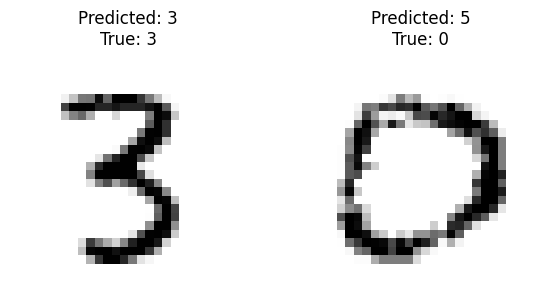

In [91]:
visualizer(model_a,'model_a')

In [86]:
logger(model_a, history_a, name='model_a')

### Model B

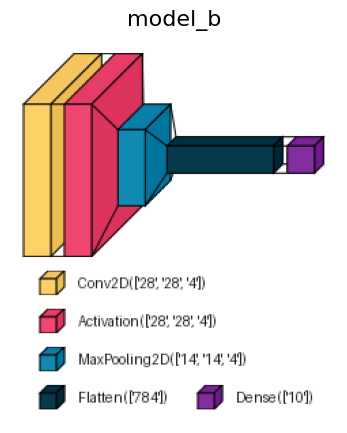

In [35]:
# model b is the WORST modofied version of baseline with at least 3 different parameters 
model_b = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(4, (1, 1), input_shape=(28, 28, 1)),
    tf.keras.layers.Activation('tanh'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='tanh')
])

model_b.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
#model_b.build(input_shape=(None, 28, 28, 1)) 
model_visualizer(model_b,'model_b')

In [36]:
history_b = model_b.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))
test_loss_a, test_acc_a = model_a.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model_a: {test_acc_a * 100:.2f}%")
test_loss_b, test_acc_b = model_b.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model_b: {test_acc_b * 100:.2f}%")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4230 - loss: 2.9987 - val_accuracy: 0.4437 - val_loss: 2.2361
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4288 - loss: 2.2595 - val_accuracy: 0.4167 - val_loss: 2.1994
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3621 - loss: 2.2212 - val_accuracy: 0.4081 - val_loss: 2.2031
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3624 - loss: 2.2006 - val_accuracy: 0.4184 - val_loss: 2.1759
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3667 - loss: 2.2281 - val_accuracy: 0.4154 - val_loss: 2.1984
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3602 - loss: 2.2217 - val_accuracy: 0.3542 - val_loss: 2.3000
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3045 - loss: 2.3024 - val_accuracy: 0.3543 - val_loss: 2.3000
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3050 - loss: 2.3023 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step


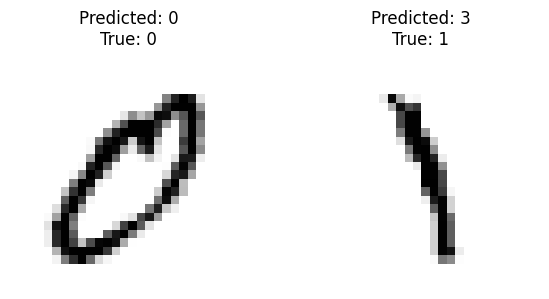

In [96]:
visualizer(model_b,'model_b')

In [76]:
logger(model_b, history_b, name='model_b')

### Comparision

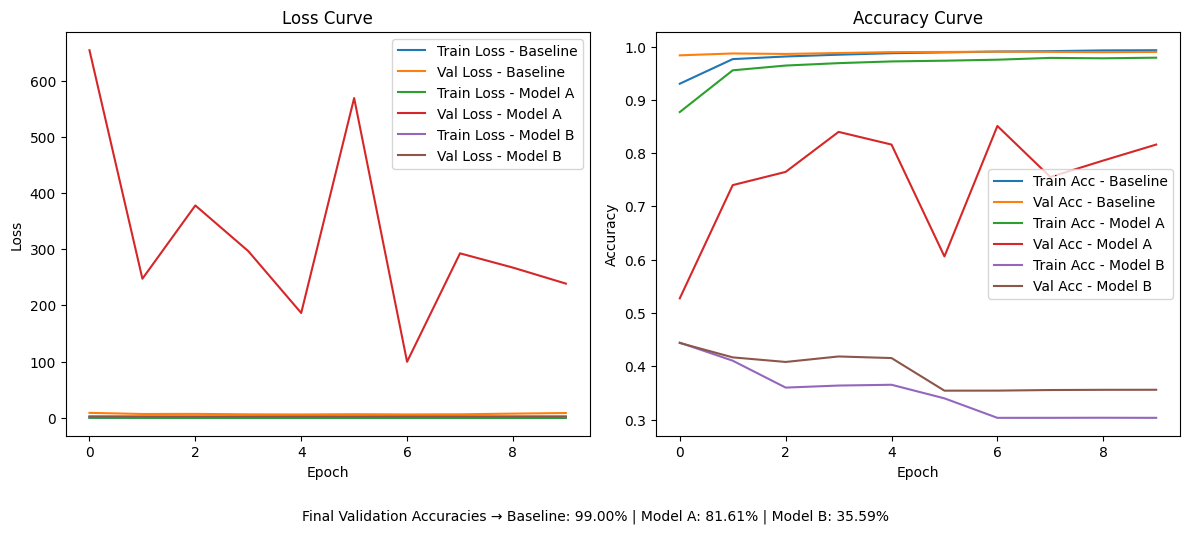

In [92]:
plotter(history, history_a, history_b, labels=['Baseline', 'Model A', 'Model B'], name='q2')

## Question 3
* It is asked to change some parameters on the model to analyze the effects.
* Each paramters is achieved from the baseline model
    * The models are named after changed parameters.


### Learning-rate
* model_learningrate is the same with baseline except learning rate.
* detailed explenation is in the report.

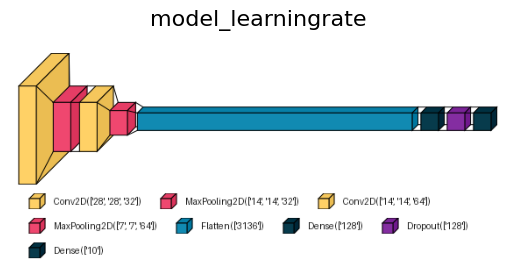

In [39]:
model_learningrate = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model_learningrate.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_visualizer(model_learningrate,'model_learningrate')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.1081 - loss: 2.3359 - val_accuracy: 0.1176 - val_loss: 4.9692
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1055 - loss: 2.3032 - val_accuracy: 0.1211 - val_loss: 4.9186
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1103 - loss: 2.3026 - val_accuracy: 0.1213 - val_loss: 4.9547
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1095 - loss: 2.3030 - val_accuracy: 0.1171 - val_loss: 4.9518
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1074 - loss: 2.3030 - val_accuracy: 0.1218 - val_loss: 4.9470
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1094 - loss: 2.3029 - val_accuracy: 0.1202 - val_loss: 4.9750
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1062 - loss: 2.3032 - val_accuracy: 0.1193 - val_loss: 4.9362
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1080 - loss: 2.3029 - val_accuracy: 0.

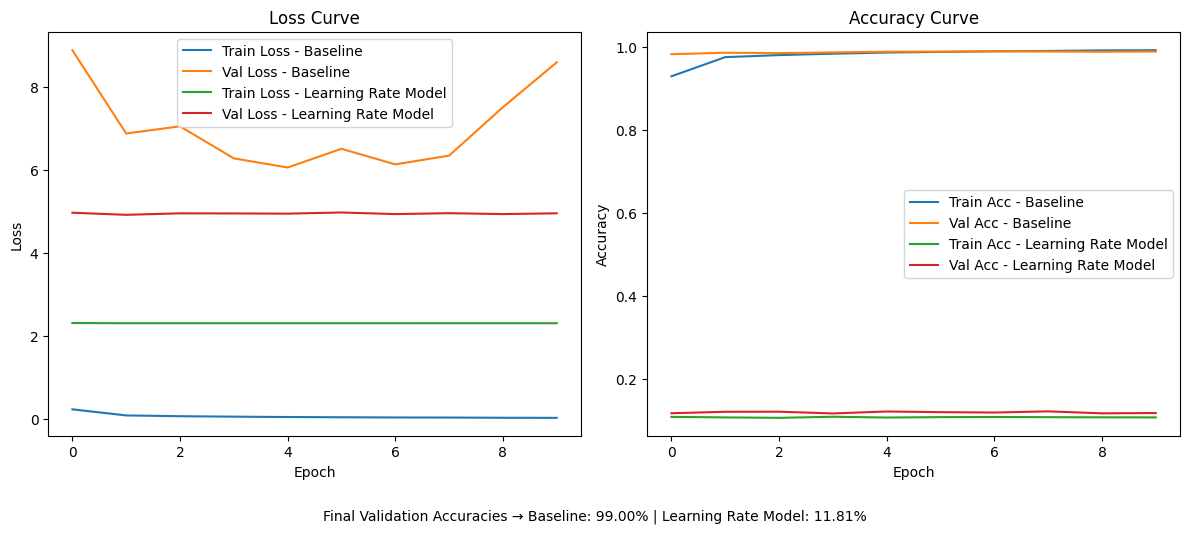

Accuracy of model_learningrate: 11.81%
Accuracy of model: 99.00%


In [40]:
# fit the model to learn from the data
history_learningrate=model_learningrate.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))
#plot the loss and accuracy of the model to compare with the baseline model.
plotter(history, history_learningrate, labels=['Baseline', 'Learning Rate Model'],name='learning_rate')
test_loss_learningrate, test_acc_learningrate = model_learningrate.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model_learningrate: {test_acc_learningrate * 100:.2f}%")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model: {test_acc * 100:.2f}%")

In [98]:
logger(model_learningrate, history_learningrate, name='model_learningrate')

### Optimizer
* In baseline Adam Optimizer is used.
* In this new model, only optimizer is changed.

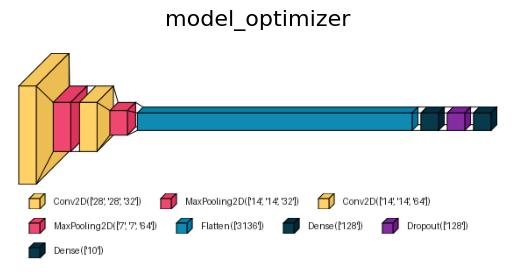

In [41]:
model_optimizer = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# sgd optimizer is used instead of adam
model_optimizer.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_visualizer(model_optimizer,'model_optimizer')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.4974 - loss: 1.5440 - val_accuracy: 0.9184 - val_loss: 32.9849
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8868 - loss: 0.3701 - val_accuracy: 0.9310 - val_loss: 28.1795
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9174 - loss: 0.2706 - val_accuracy: 0.9555 - val_loss: 19.3873
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9353 - loss: 0.2146 - val_accuracy: 0.9651 - val_loss: 13.9220
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9463 - loss: 0.1815 - val_accuracy: 0.9689 - val_loss: 13.5260
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9533 - loss: 0.1568 - val_accuracy: 0.9708 - val_loss: 11.7292
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9579 - loss: 0.1383 - val_accuracy: 0.9756 - val_loss: 9.7363
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9622 - loss: 0.1280 - val_accura

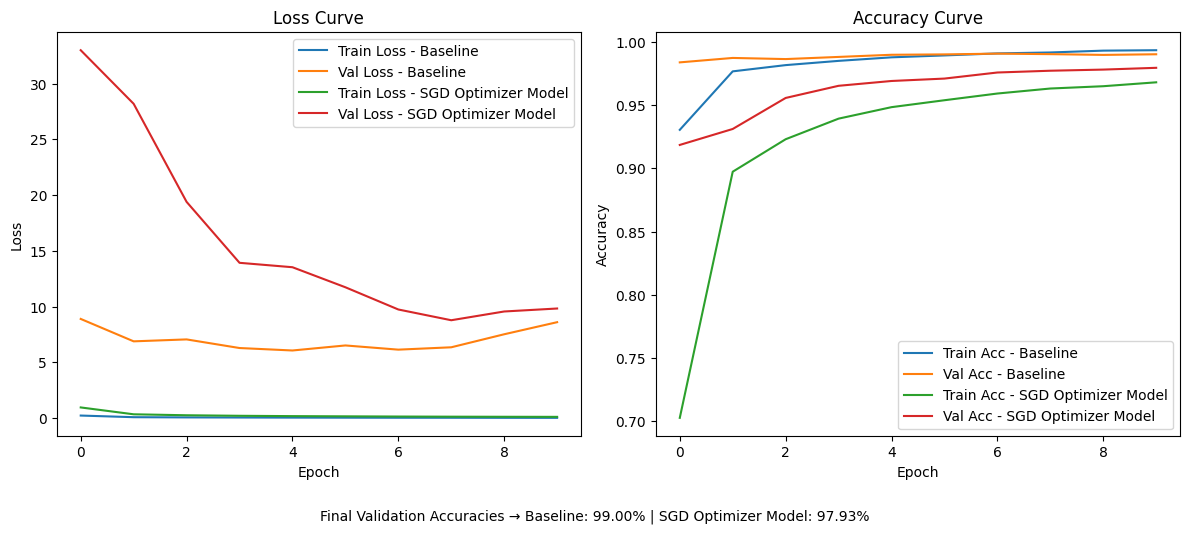

Accuracy of model_optimizer: 97.93%
Accuracy of model: 99.00%


In [42]:
history_optimizer=model_optimizer.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))
plotter(history, history_optimizer, labels=['Baseline', 'SGD Optimizer Model'],name='optimizer')
test_loss_optimizer, test_acc_optimizer = model_optimizer.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model_optimizer: {test_acc_optimizer * 100:.2f}%")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model: {test_acc * 100:.2f}%")

In [100]:
logger(model_optimizer, history_optimizer, name='model_optimizer')

### Batch Size
* The next model will be the same with baseline
* although, the batch size will change.
* _batch size 64 → 16_

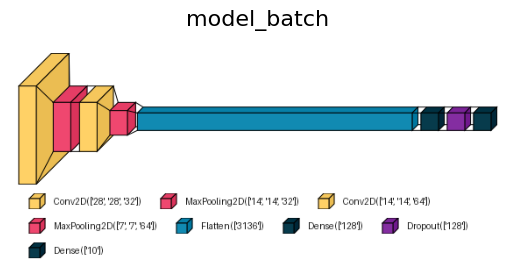

In [43]:
# this model is the same as the baseline model but it uses different batch size.
model_batch= tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_batch.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_visualizer(model_batch,'model_batch')

Epoch 1/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8881 - loss: 0.3559 - val_accuracy: 0.9844 - val_loss: 8.5559
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9768 - loss: 0.0796 - val_accuracy: 0.9814 - val_loss: 10.1560
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9828 - loss: 0.0577 - val_accuracy: 0.9811 - val_loss: 11.3747
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9876 - loss: 0.0427 - val_accuracy: 0.9634 - val_loss: 29.9091
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9900 - loss: 0.0345 - val_accuracy: 0.9612 - val_loss: 35.8564
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9908 - loss: 0.0304 - val_accuracy: 0.9678 - val_loss: 33.6961
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9915 - loss: 0.0260 - val_accuracy: 0.9515 - val_loss: 55.1532
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9926 - l

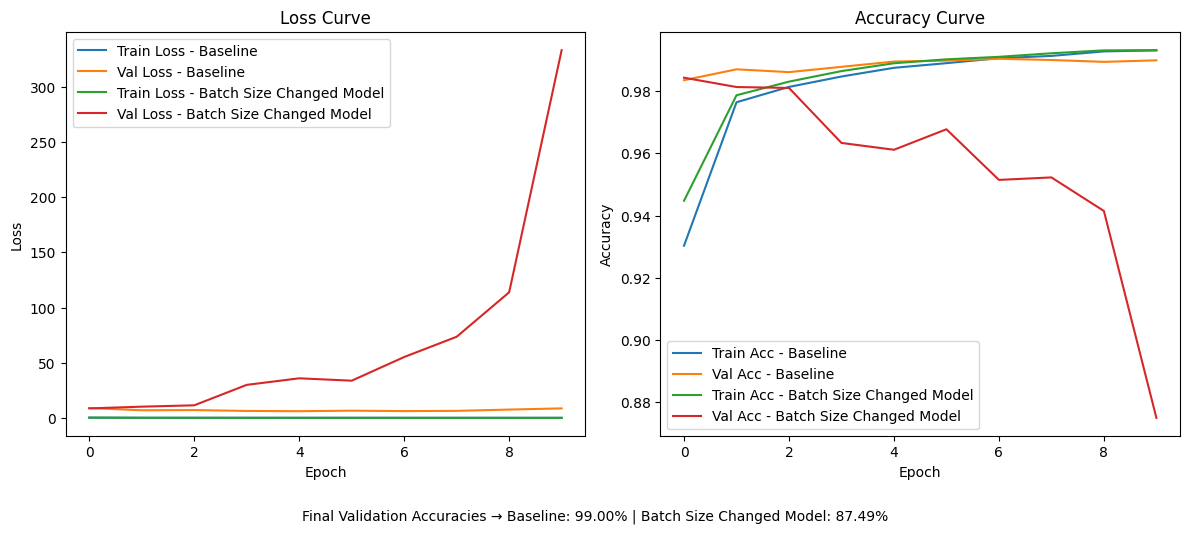

Accuracy of model_batch: 87.49%
Accuracy of model: 99.00%


In [44]:
#batch size is changed to 16
history_batch=model_batch.fit(x_train, y_train,
                    epochs=10,
                    batch_size=16,  
                    validation_data=(x_test, y_test))
plotter(history, history_batch, labels=['Baseline', 'Batch Size Changed Model'],name='batch_size')
test_loss_batch, test_acc_batch = model_batch.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model_batch: {test_acc_batch * 100:.2f}%")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model: {test_acc * 100:.2f}%")

In [103]:
logger(model_batch, history_batch, name='model_batch')

### Dropout Rate
* In the next model, only the dropout rate will change.

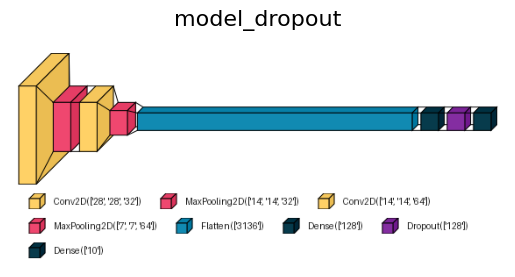

In [45]:
model_dropout= tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.93),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_dropout.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])   
model_visualizer(model_dropout,'model_dropout')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.3352 - loss: 1.6817 - val_accuracy: 0.9658 - val_loss: 9.1174
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5283 - loss: 1.1077 - val_accuracy: 0.9745 - val_loss: 8.8136
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5996 - loss: 0.9292 - val_accuracy: 0.9733 - val_loss: 10.5118
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6327 - loss: 0.8411 - val_accuracy: 0.9721 - val_loss: 12.2582
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6474 - loss: 0.8091 - val_accuracy: 0.9788 - val_loss: 9.5151
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6653 - loss: 0.7650 - val_accuracy: 0.9751 - val_loss: 11.8176
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6764 - loss: 0.7401 - val_accuracy: 0.9605 - val_loss: 19.0360
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6813 - loss: 0.7310 - val_accuracy

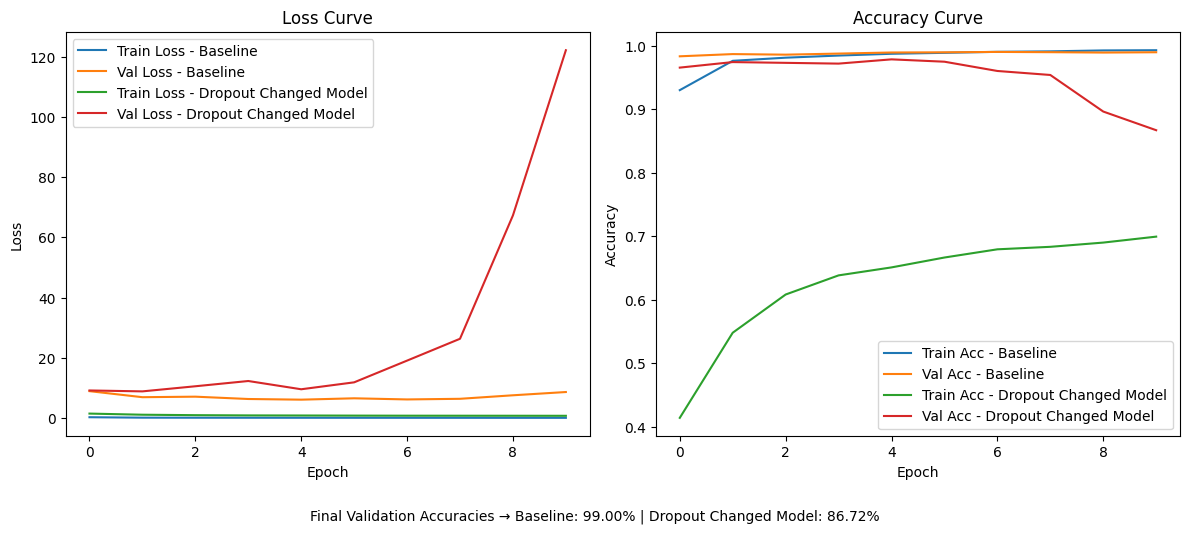

Accuracy of model_dropout: 86.72%
Accuracy of model: 99.00%


In [46]:
history_dropout=model_dropout.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))
plotter(history, history_dropout, labels=['Baseline', 'Dropout Changed Model'],name='dropout')
test_loss_dropout, test_acc_dropout = model_dropout.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model_dropout: {test_acc_dropout * 100:.2f}%")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model: {test_acc * 100:.2f}%")

In [104]:
logger(model_dropout, history_dropout, name='model_dropout')

### Weight initialization

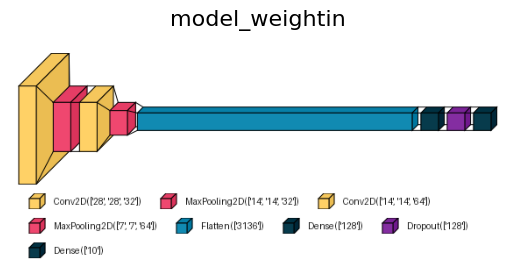

In [47]:
model_weightin = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_initializer='he_normal'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_initializer='he_normal'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
                          kernel_initializer='he_normal'),   
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax',
                          kernel_initializer='glorot_uniform')
])
model_weightin.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_visualizer(model_weightin,'model_weightin')

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8625 - loss: 0.4423 - val_accuracy: 0.9830 - val_loss: 8.6826
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9742 - loss: 0.0855 - val_accuracy: 0.9869 - val_loss: 6.1003
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9821 - loss: 0.0626 - val_accuracy: 0.9893 - val_loss: 5.2602
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9861 - loss: 0.0465 - val_accuracy: 0.9890 - val_loss: 5.2605
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9875 - loss: 0.0420 - val_accuracy: 0.9901 - val_loss: 5.9177
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9899 - loss: 0.0324 - val_accuracy: 0.9866 - val_loss: 8.8518
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9908 - loss: 0.0313 - val_accuracy: 0.9895 - val_loss: 6.9578
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.

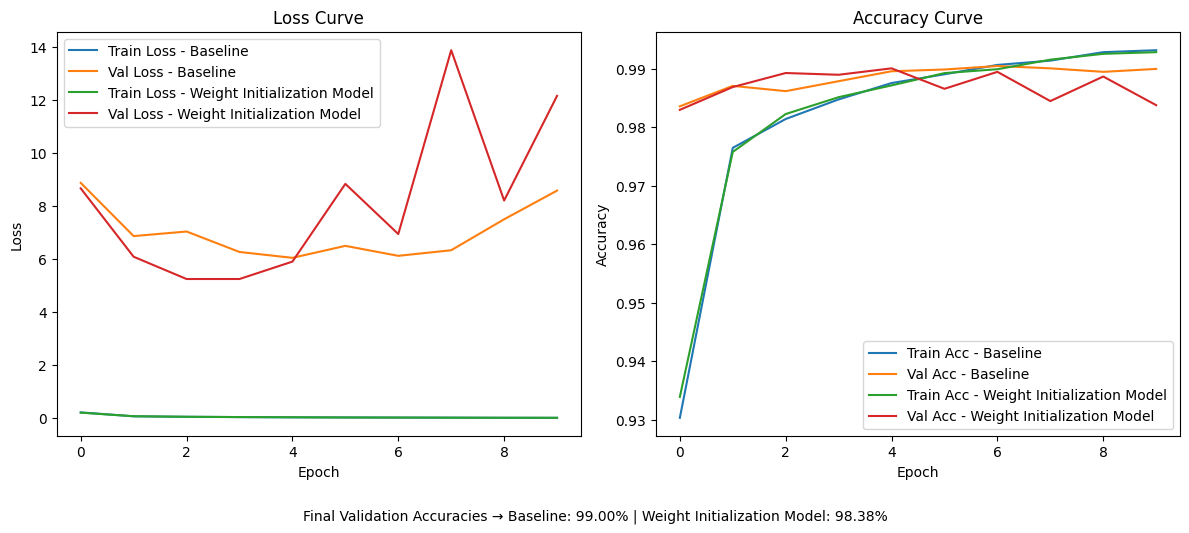

Accuracy of model_weightin: 98.38%
Accuracy of model: 99.00%


In [48]:
history_weightin=model_weightin.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))
plotter(history, history_weightin, labels=['Baseline', 'Weight Initialization Model'],name='weight_initialization')
test_loss_weightin, test_acc_weightin = model_weightin.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model_weightin: {test_acc_weightin * 100:.2f}%")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy of model: {test_acc * 100:.2f}%")

## Question 4
* There are 3 intentionally worsened CNN examples.
* Each of them is explained in detail in the report.

### Model_1
* very first failed model
* consists less layers
* kernel size (1,1) is no good
* relu and tanh activation functions are not working in harmony.
* batch size is little bit off the grid (higher than usual).

In [49]:
# first worst model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(16, (1, 1), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),  
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='tanh')  
])

model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history_1 = model_1.fit(x_train, y_train,
                        epochs=10,
                        batch_size=256,
                        validation_data=(x_test, y_test),
                        verbose=1)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4263 - loss: 3.0797 - val_accuracy: 0.1684 - val_loss: 2.2306
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4545 - loss: 2.2087 - val_accuracy: 0.1843 - val_loss: 2.1634
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4538 - loss: 2.1873 - val_accuracy: 0.1636 - val_loss: 2.1960
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5197 - loss: 2.2039 - val_accuracy: 0.1894 - val_loss: 2.1658
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4931 - loss: 2.2037 - val_accuracy: 0.1605 - val_loss: 2.1906
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5051 - loss: 2.2058 - val_accuracy: 0.1593 - val_loss: 2.1912
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5220 - loss: 2.2177 - val_accuracy: 0.1591 - val_loss: 2.1917
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5348 - loss: 2.2288 - val_accuracy: 0.

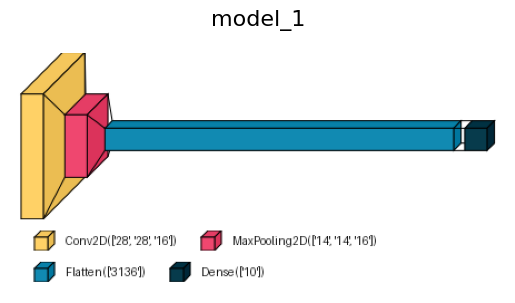

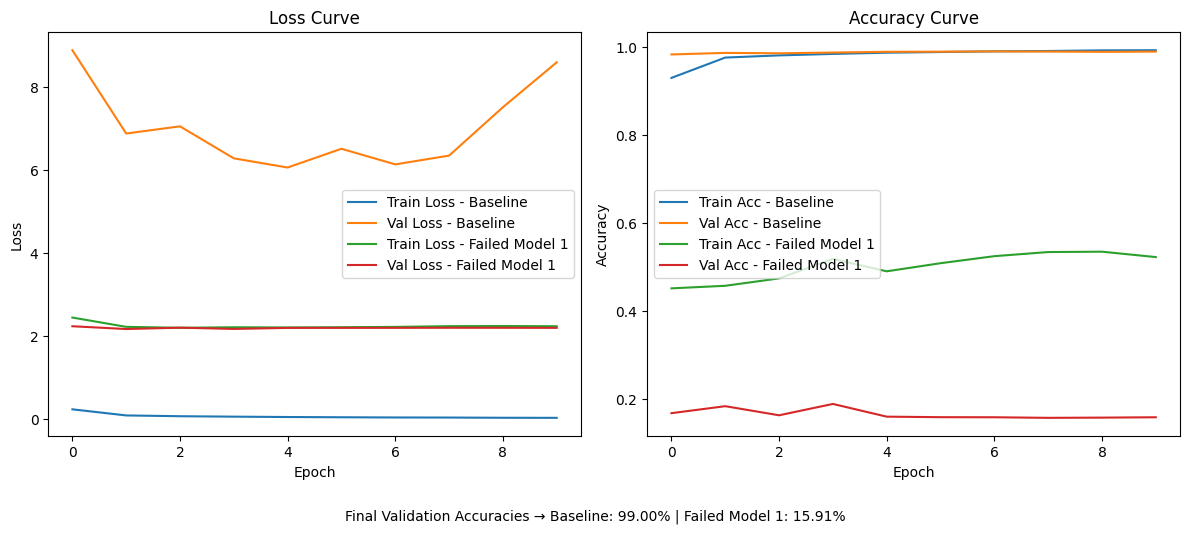

In [50]:
model_visualizer(model_1,'model_1')
plotter(history, history_1, labels=['Baseline', 'Failed Model 1'], name='failed_model_1')

In [109]:
logger(model_1, history_1, name='model_1')

### Model_2
* layer structure is normal, but convolution layers use inappropriate filter sizes
* learning rate dramatically high than it should be
* batch size is too large, which harms generalization and model convergence


In [113]:
#model 2 is the second worst model with very high learning rate
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(2, (3, 3), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(2, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Çok yüksek learning rate ile SGD kullanılıyor
model_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=2.0),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history_2 = model_2.fit(x_train, y_train,
                        epochs=10,
                        batch_size=512,
                        validation_data=(x_test, y_test),
                        verbose=1)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.1358 - loss: 2.4044 - val_accuracy: 0.1516 - val_loss: 2.8830
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1104 - loss: 2.3022 - val_accuracy: 0.1524 - val_loss: 2.8900
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.1094 - loss: 2.3024 - val_accuracy: 0.1429 - val_loss: 2.8891
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1114 - loss: 2.3021 - val_accuracy: 0.1429 - val_loss: 2.8683
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1106 - loss: 2.3022 - val_accuracy: 0.1325 - val_loss: 2.8796
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1119 - loss: 2.3020 - val_accuracy: 0.1457 - val_loss: 2.8826
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1095 - loss: 2.3028 - val_accuracy: 0.1429 - val_loss: 2.8847
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1099 - loss: 2.3025 - val_accu

c:\Users\alio\AppData\Local\Programs\Python\Python311\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


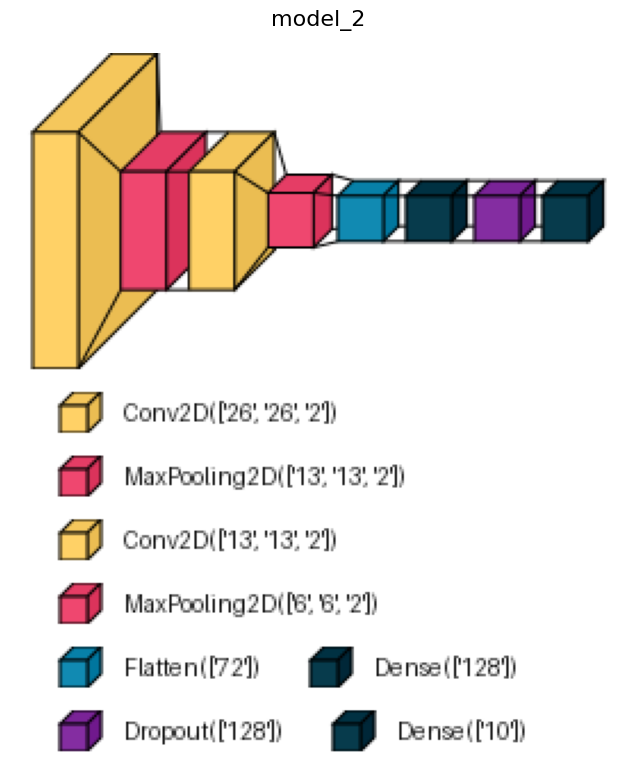

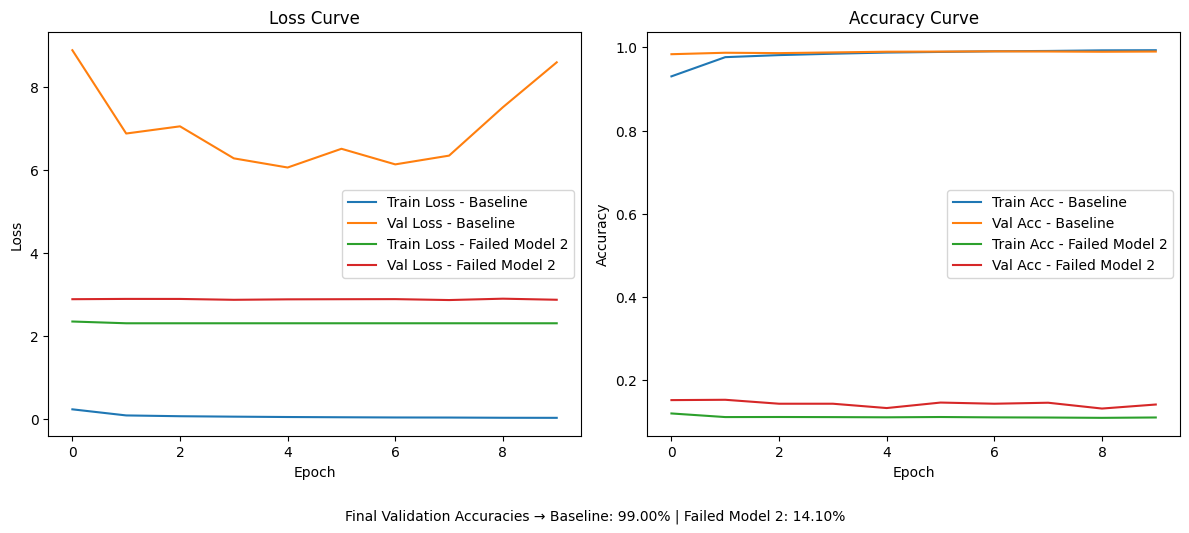

In [114]:
model_visualizer(model_2,'model_2')
plotter(history, history_2, labels=['Baseline', 'Failed Model 2'], name='failed_model_2')

In [112]:
logger(model_2, history_2, name='model_2')

### Model_3
* the worst model so far is this.
* activation functions are not in harmony. 
    * meaning that they can not work properly with each other.
* convolution layer's filter size are randomly selected.
* kernel sizes are no good either.
* weights are initialized randomly.
    * even the randomness is random.
    * each of the weights are given different random distribution.
* even without all others, epoch size is not great for model to learn.
* batch size is tremendously high.
    * even if the model architecture were reasonable, 
    * such a large batch size would prevent effective learning and generalization

In [53]:
#model 3 uses lots of random weights, very large batch size, not enough epochs, random activation functions, and a very small dropout rate
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (7,7), activation='hard_sigmoid',
                           kernel_initializer='random_uniform', padding='valid', 
                           bias_initializer=tf.keras.initializers.RandomNormal(mean=0.9, stddev=3)),
    #tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(2, (1, 1), activation='linear',
                           kernel_initializer='ones', padding='same', bias_initializer='random_uniform'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='silu', kernel_initializer=tf.keras.initializers.lecun_normal(),
                          bias_initializer=tf.keras.initializers.constant(value=9)),
    tf.keras.layers.Dense(10, activation='softmax',
                          kernel_initializer=tf.keras.initializers.RandomUniform(minval=-15, maxval=25))
])

model_3.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',  
                metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train,
                        epochs=5,
                        batch_size=4096, 
                        validation_data=(x_test, y_test),
                        verbose=1)

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 406ms/step - accuracy: 0.1002 - loss: 1079.2983 - val_accuracy: 0.1430 - val_loss: 693.7808
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 393ms/step - accuracy: 0.1011 - loss: 366.7366 - val_accuracy: 0.1551 - val_loss: 502.3487
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.1081 - loss: 133.1484 - val_accuracy: 0.1550 - val_loss: 449.5254
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 391ms/step - accuracy: 0.1078 - loss: 71.9937 - val_accuracy: 0.1840 - val_loss: 399.3760
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.1427 - loss: 43.4089 - val_accuracy: 0.1805 - val_loss: 370.3684


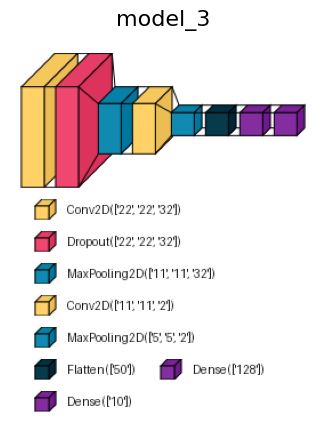

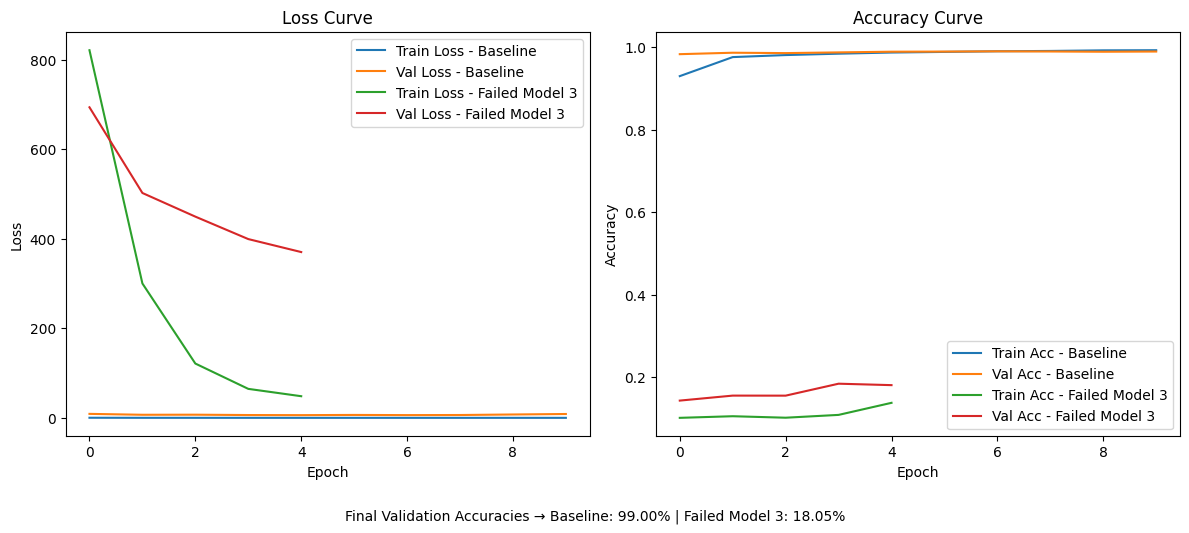

In [54]:
model_visualizer(model_3,'model_3')
plotter(history, history_3, labels=['Baseline', 'Failed Model 3'], name='failed_model_3')

In [116]:
logger(model_3 , history_3, name='model_3')